In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
df = pd.read_csv('pima-indians-diabetes.csv', skiprows=1, names= col_names)
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [38]:
df.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
#spillting data into target and features
features_cols = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']
X = df[features_cols]
Y = df['label']

In [44]:
#spillting data into train and test reserves
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X,Y, test_size =0.25, random_state=16)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
515,3,163,70,18,105,31.6,0.268,28
462,8,74,70,40,49,35.3,0.705,39
55,1,73,50,10,0,23.0,0.248,21
684,5,136,82,0,0,0.0,0.640,69
383,1,90,62,18,59,25.1,1.268,25
...,...,...,...,...,...,...,...,...
164,0,131,88,0,0,31.6,0.743,32
571,2,130,96,0,0,22.6,0.268,21
304,3,150,76,0,0,21.0,0.207,37
58,0,146,82,0,0,40.5,1.781,44


In [42]:
#model building using fit method
from sklearn.linear_model import LogisticRegression as LR
LogR = LR(random_state=16, max_iter=170)

LogR.fit(x_train,y_train)

LogisticRegression(max_iter=170, random_state=16)

In [46]:
y_pred = LogR.predict(x_test)
print(x_test[0:2])
print(y_pred[0:2])

     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
515         3      163  70    18      105  31.6     0.268   28
462         8       74  70    40       49  35.3     0.705   39
[1 0]


In [51]:
#model Evaluation
from sklearn import metrics
cnf_mat = metrics.confusion_matrix(y_test, y_pred)
cnf_mat

array([[116,   9],
       [ 25,  42]], dtype=int64)

In [53]:
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy',acc)

accuracy 0.8229166666666666


In [56]:
df2 = pd.DataFrame({'prediction': y_pred, 'actual':y_test})
df2

,prediction,actual
515,1,1
462,0,0
55,0,0
684,0,0
383,0,0
...,...,...
164,0,1
571,0,0
304,0,0
58,1,0


In [57]:
from sklearn.metrics import classification_report as CR
target = ['Without Dia', 'With Dia']
print(CR(y_test,y_pred, target_names=target))

              precision    recall  f1-score   support

 Without Dia       0.82      0.93      0.87       125
    With Dia       0.82      0.63      0.71        67

    accuracy                           0.82       192
   macro avg       0.82      0.78      0.79       192
weighted avg       0.82      0.82      0.82       192



In [60]:
y_pred_proba = LogR.predict_proba(x_test)
y_pred_proba = y_pred_proba[:,1] 
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)

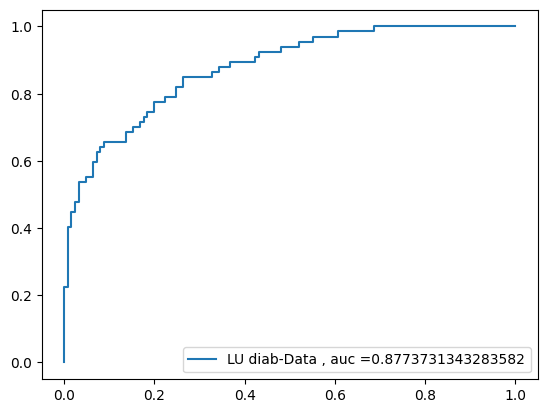

In [61]:
plt.plot(fpr,tpr,label="LU diab-Data , auc ="+str(auc))
plt.legend(loc=4)
plt.show()